<a href="https://colab.research.google.com/github/yewcheng/Stock-Price-Prediction/blob/main/DAC_Internal_Project_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error 

In [71]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
meta = yf.Ticker('META')

In [73]:
history = meta.history(start='2023-1-1', end='2023-1-31')
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,122.820000,126.370003,122.279999,124.739998,35528500,0.0,0.0
2023-01-04 00:00:00-05:00,127.379997,129.050003,125.849998,127.370003,32397100,0.0,0.0
2023-01-05 00:00:00-05:00,126.129997,128.520004,124.540001,126.940002,25447100,0.0,0.0
2023-01-06 00:00:00-05:00,128.970001,130.330002,126.040001,130.020004,27584500,0.0,0.0
2023-01-09 00:00:00-05:00,131.160004,132.949997,129.279999,129.470001,26649100,0.0,0.0
2023-01-10 00:00:00-05:00,127.269997,133.440002,127.150002,132.990005,28684400,0.0,0.0
2023-01-11 00:00:00-05:00,130.960007,133.850006,130.339996,132.889999,25423000,0.0,0.0
2023-01-12 00:00:00-05:00,133.440002,137.679993,131.759995,136.710007,30757700,0.0,0.0
2023-01-13 00:00:00-05:00,134.970001,137.389999,134.839996,136.979996,22423800,0.0,0.0


In [74]:
fb_stockprice = pd.DataFrame(history)
fb_stockprice

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,122.820000,126.370003,122.279999,124.739998,35528500,0.0,0.0
2023-01-04 00:00:00-05:00,127.379997,129.050003,125.849998,127.370003,32397100,0.0,0.0
2023-01-05 00:00:00-05:00,126.129997,128.520004,124.540001,126.940002,25447100,0.0,0.0
2023-01-06 00:00:00-05:00,128.970001,130.330002,126.040001,130.020004,27584500,0.0,0.0
2023-01-09 00:00:00-05:00,131.160004,132.949997,129.279999,129.470001,26649100,0.0,0.0
2023-01-10 00:00:00-05:00,127.269997,133.440002,127.150002,132.990005,28684400,0.0,0.0
2023-01-11 00:00:00-05:00,130.960007,133.850006,130.339996,132.889999,25423000,0.0,0.0
2023-01-12 00:00:00-05:00,133.440002,137.679993,131.759995,136.710007,30757700,0.0,0.0
2023-01-13 00:00:00-05:00,134.970001,137.389999,134.839996,136.979996,22423800,0.0,0.0


In [75]:
df=history
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,122.820000,126.370003,122.279999,124.739998,35528500,0.0,0.0
2023-01-04 00:00:00-05:00,127.379997,129.050003,125.849998,127.370003,32397100,0.0,0.0
2023-01-05 00:00:00-05:00,126.129997,128.520004,124.540001,126.940002,25447100,0.0,0.0
2023-01-06 00:00:00-05:00,128.970001,130.330002,126.040001,130.020004,27584500,0.0,0.0
2023-01-09 00:00:00-05:00,131.160004,132.949997,129.279999,129.470001,26649100,0.0,0.0
2023-01-10 00:00:00-05:00,127.269997,133.440002,127.150002,132.990005,28684400,0.0,0.0
2023-01-11 00:00:00-05:00,130.960007,133.850006,130.339996,132.889999,25423000,0.0,0.0
2023-01-12 00:00:00-05:00,133.440002,137.679993,131.759995,136.710007,30757700,0.0,0.0
2023-01-13 00:00:00-05:00,134.970001,137.389999,134.839996,136.979996,22423800,0.0,0.0


In [76]:
df.shape

(19, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

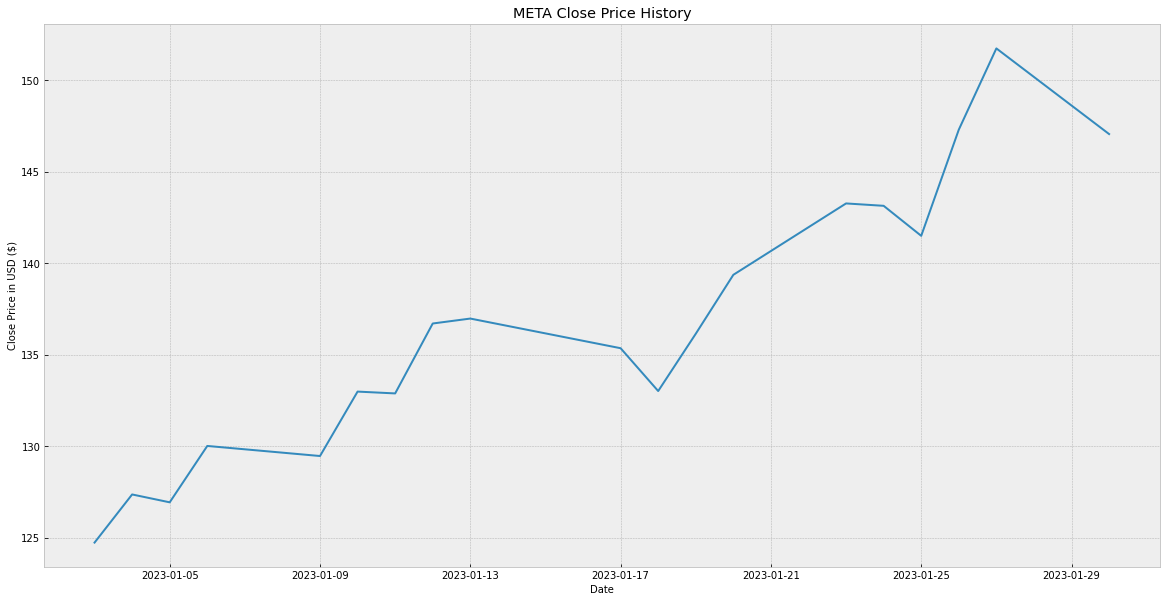

In [77]:
plt.figure(figsize=(20,10))
plt.title('META Close Price History')
plt.plot(fb_stockprice['Close'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price in USD ($)', fontsize=10)
plt.show

In [78]:
df = df[['Close']]
df

,Close
Date,
2023-01-03 00:00:00-05:00,124.739998
2023-01-04 00:00:00-05:00,127.370003
2023-01-05 00:00:00-05:00,126.940002
2023-01-06 00:00:00-05:00,130.020004
2023-01-09 00:00:00-05:00,129.470001
2023-01-10 00:00:00-05:00,132.990005
2023-01-11 00:00:00-05:00,132.889999
2023-01-12 00:00:00-05:00,136.710007
2023-01-13 00:00:00-05:00,136.979996


In [79]:
futuredays= 9

df['Prediction'] = df[['Close']].shift(-futuredays)
df

<ipython-input-79-b57c20a30aa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-futuredays)


,Close,Prediction
Date,,
2023-01-03 00:00:00-05:00,124.739998,135.360001
2023-01-04 00:00:00-05:00,127.370003,133.020004
2023-01-05 00:00:00-05:00,126.940002,136.149994
2023-01-06 00:00:00-05:00,130.020004,139.369995
2023-01-09 00:00:00-05:00,129.470001,143.270004
2023-01-10 00:00:00-05:00,132.990005,143.139999
2023-01-11 00:00:00-05:00,132.889999,141.500000
2023-01-12 00:00:00-05:00,136.710007,147.300003
2023-01-13 00:00:00-05:00,136.979996,151.740005


In [80]:
X = np.array(df.drop(['Prediction'], 1))[:-futuredays]
print(X)

[[124.73999786]
 [127.37000275]
 [126.94000244]
 [130.02000427]
 [129.47000122]
 [132.99000549]
 [132.88999939]
 [136.71000671]
 [136.97999573]
 [135.36000061]]


<ipython-input-80-1b9e02a2fd68>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))[:-futuredays]


In [81]:
Y = np.array(df['Prediction'])[:-futuredays]
print(Y)

[135.36000061 133.02000427 136.1499939  139.36999512 143.27000427
 143.13999939 141.5        147.30000305 151.74000549 147.05999756]


In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [83]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)

In [84]:
x_futuredays = df.drop(['Prediction'], 1)[:-futuredays]
x_futuredays = x_futuredays.tail(futuredays)
x_futuredays = np.array(x_futuredays)
x_futuredays

<ipython-input-84-64869c49f2cd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_futuredays = df.drop(['Prediction'], 1)[:-futuredays]


array([[127.37000275],
       [126.94000244],
       [130.02000427],
       [129.47000122],
       [132.99000549],
       [132.88999939],
       [136.71000671],
       [136.97999573],
       [135.36000061]])

In [85]:
tree_prediction = tree.predict(x_futuredays)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_futuredays)
print(lr_prediction)

[133.02000427 136.1499939  139.36999512 143.27000427 143.13999939
 143.13999939 147.30000305 147.30000305 147.05999756]

[136.97262863 136.46847823 140.07960161 139.43475495 143.56175565
 143.4445043  147.92324117 148.23978762 146.34043737]


<ipython-input-86-944c5f2686c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


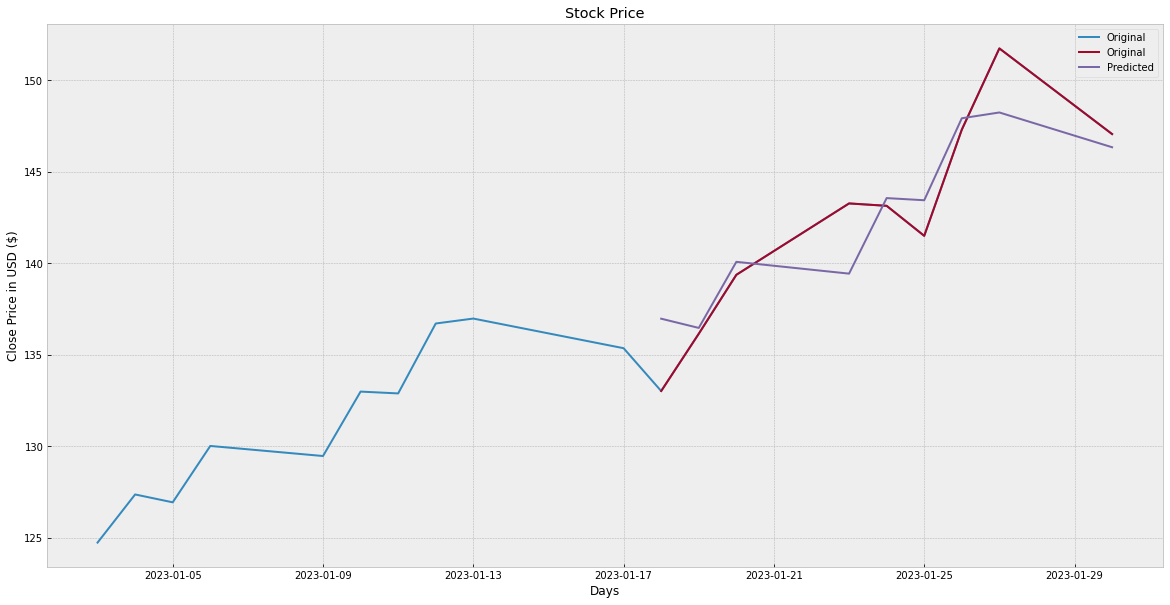

In [86]:
#Linear regression
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Stock Price')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close']])
plt.plot(valid[['Predictions']])
plt.legend(['Original', 'Original', 'Predicted'])
plt.show()

<ipython-input-88-669a48a66c8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


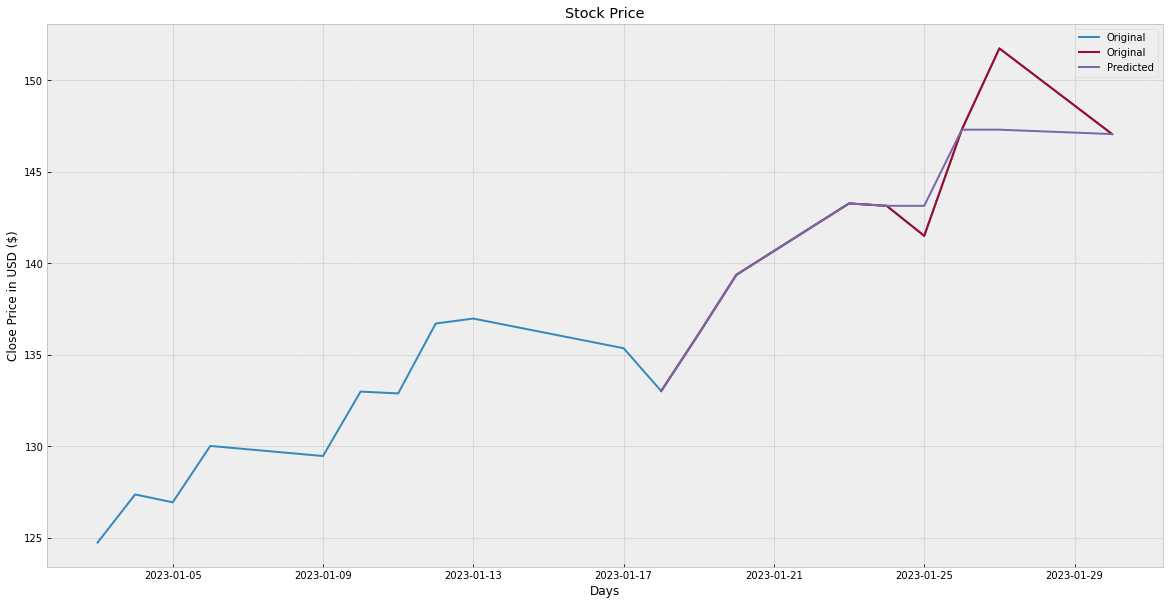

In [88]:
#Decision Tree regression
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Stock Price')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close']])
plt.plot(valid[['Predictions']])
plt.legend(['Original' , 'Original', 'Predicted'])
plt.show()